![kc_logo](images/king_county_logo.png)

# King County Property Analysis

**Author:** Scott Graham

# Overview

The goal of this analysis is to view data from King County of property sale prices in 2014 and 2015 and provide insight to prospective buyers and sellers what property features will provide the best sale price.

# Hypothesis

**Ho (Null Hypothesis) -** There is no key indicators that any property features will increase sales price

**Ha (Alternative Hypothesis) -** There are indicators that certain features of a property will provide a higher chance of increased sales price

# Data Understanding

Importing the appropriate libraries and data to Python:

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv ('data/kc_house_data.csv')

In [3]:
# View the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Remove columns that I deem unnessary for this analysis
data.drop(columns = ['view', 'date', 'sqft_above','sqft_basement','zipcode','lat',
                         'long','sqft_living15','sqft_lot15', 'yr_renovated'],inplace = True)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [5]:
# Replace all nan values with 0
data = data.replace(np.nan, 0, regex=True)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004


What does "id" actually represent? What do duplicates mean or "id"? Do I need to remove these duplicates?

In [6]:
data.duplicated('id').value_counts()

False    21420
True       177
dtype: int64

In [7]:
data.sort_values('id', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15937,9900000190,268950.0,3,1.00,1320,8100,1.0,0.0,3,6,1943
20963,9895000040,399900.0,2,1.75,1410,1005,1.5,0.0,3,9,2011
7614,9842300540,339000.0,3,1.00,1100,4128,1.0,0.0,4,7,1942
3257,9842300485,380000.0,2,1.00,1040,7372,1.0,0.0,5,7,1939
16723,9842300095,365000.0,5,2.00,1600,4168,1.5,0.0,3,7,1927
...,...,...,...,...,...,...,...,...,...,...,...
8800,2800031,235000.0,3,1.00,1430,7599,1.5,0.0,4,6,1930
8404,1200021,400000.0,3,1.00,1460,43000,1.0,0.0,3,7,1952
6729,1200019,647500.0,4,1.75,2060,26036,1.0,0.0,4,8,1947
2495,1000102,300000.0,6,3.00,2400,9373,2.0,0.0,3,7,1991


In [8]:
# Viewing id values grouped to check if the id is a duplicate or house sold multiple times
pd.concat(g for _, g in data.groupby("id") if len(g) > 1).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2494,1000102,280000.0,6,3.00,2400,9373,2.0,0.0,3,7,1991
2495,1000102,300000.0,6,3.00,2400,9373,2.0,0.0,3,7,1991
16800,7200179,150000.0,2,1.00,840,12750,1.0,0.0,3,6,1925
16801,7200179,175000.0,2,1.00,840,12750,1.0,0.0,3,6,1925
11421,109200390,245000.0,3,1.75,1480,3900,1.0,0.0,4,7,1980
11422,109200390,250000.0,3,1.75,1480,3900,1.0,0.0,4,7,1980
12405,123039336,148000.0,1,1.00,620,8261,1.0,0.0,3,5,1939
12406,123039336,244900.0,1,1.00,620,8261,1.0,0.0,3,5,1939
7785,251300110,225000.0,3,2.25,2510,12013,2.0,0.0,3,8,1988
7786,251300110,358000.0,3,2.25,2510,12013,2.0,0.0,3,8,1988


From above I can see that the "id" represents the property id and the duplicates are the sale of the same house at muliptle different times, so I will rename the column to property id to avoid any confusion.

In [9]:
data.rename(columns={'id':'property_id'}, inplace=True)
data.head()

,property_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


# Exploratory Data Analysis and Visualisations

For all the variables, we will check their distribution by creating a Histogram with KDE

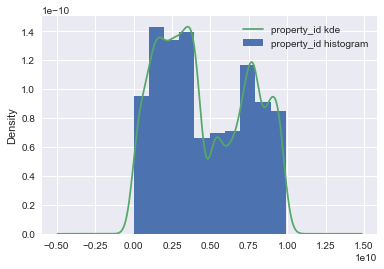

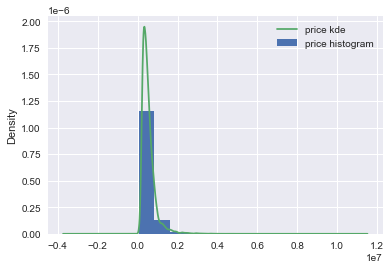

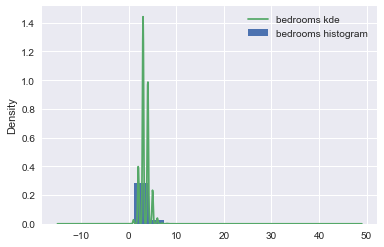

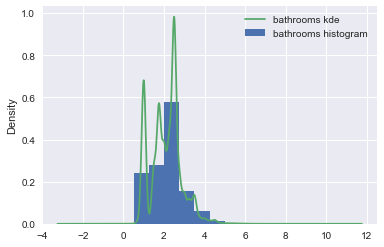

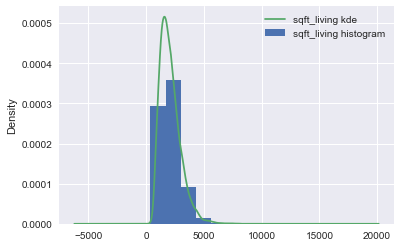

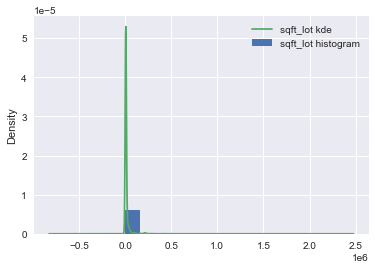

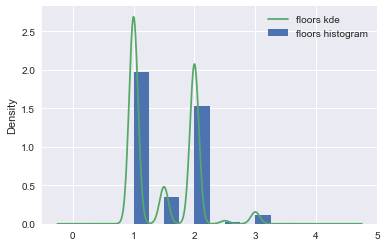

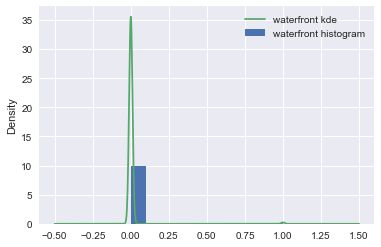

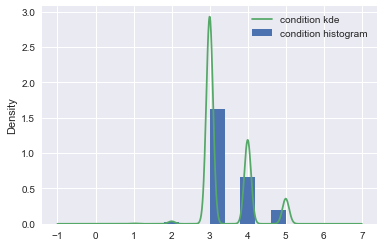

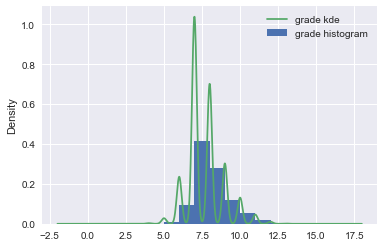

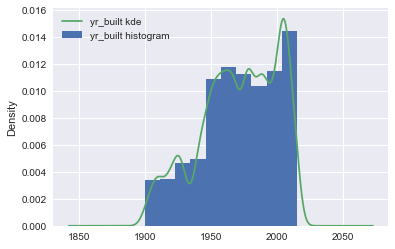

In [10]:
for column in data:
    data[column].plot.hist(density=True, label=column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Now we want to visualise the relationship between the predictors and the target (price) using scatter plots

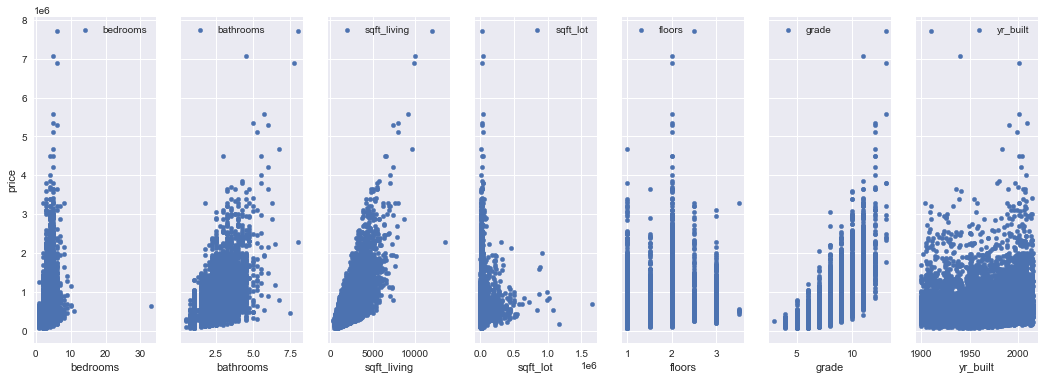

In [11]:
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

# Data Cleaning

Can clearly see that there is an issue with a house with 33 bedrooms, we will remove this.

In [12]:
data = data.drop(data[data.bedrooms == 33].index)

Further remove outliers from the rest of the data using z-score.

In [13]:
# Remove outliers using Z-Score
from scipy import stats
import numpy as np
df = data.iloc[:,[1,2,3,4,5,6,8,9,10]]
z = np.abs(stats.zscore(df))

threshold = 3

df.shape

(21596, 9)

In [14]:
data_o = df[(z < 3).all(axis=1)]
data_o.shape

(20557, 9)

In [15]:
# Convert data_o back to data for simplicity
data = data_o
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987


We now want to revist the scatter plots, Histogram and KDE to see how the data looks after removing outliers

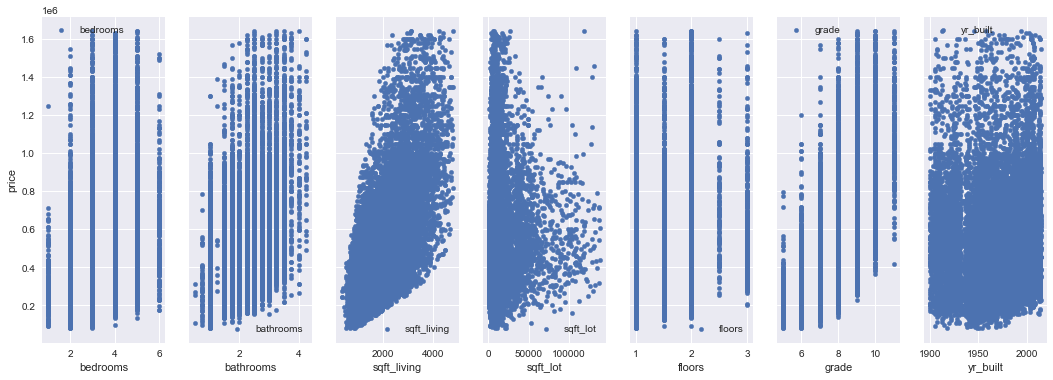

In [16]:
# Recheck the scatter plot visualisation after the removal of outliers
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

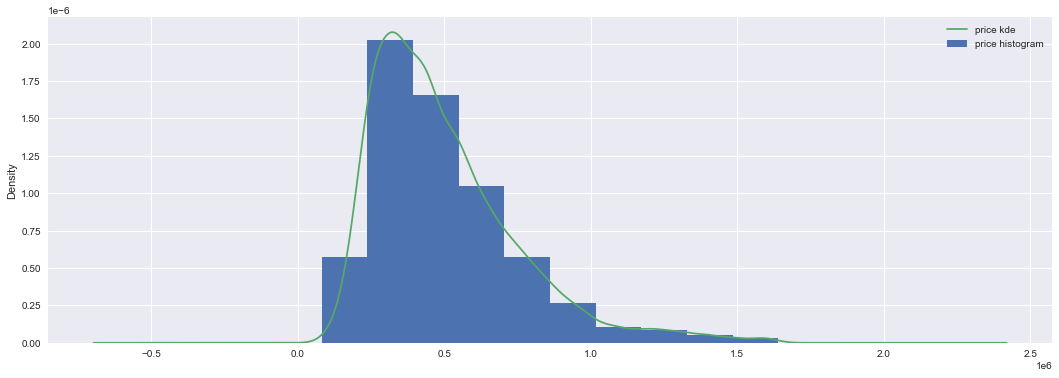

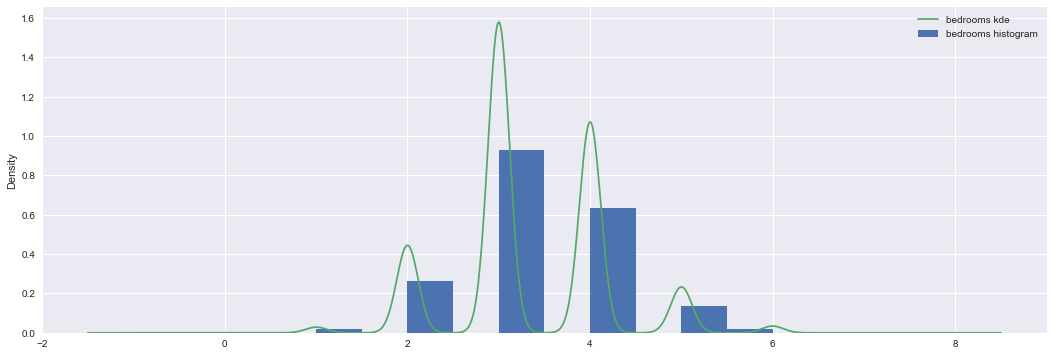

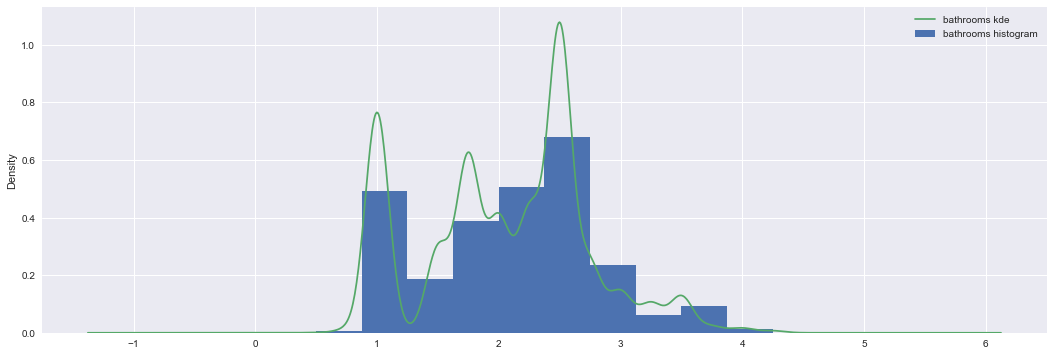

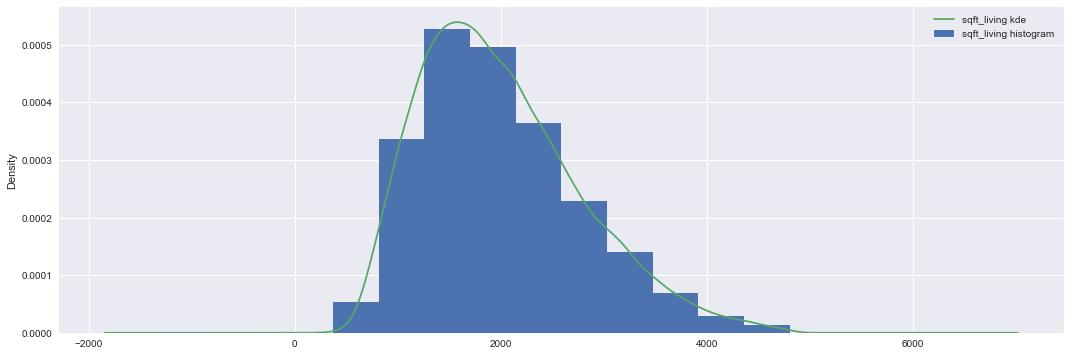

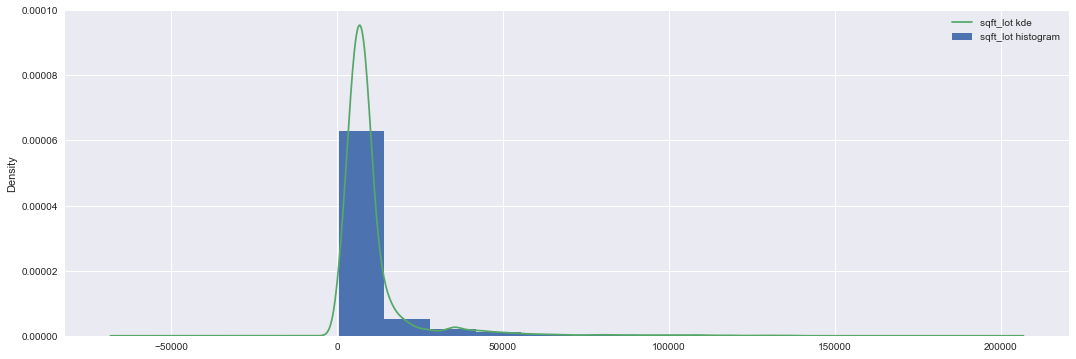

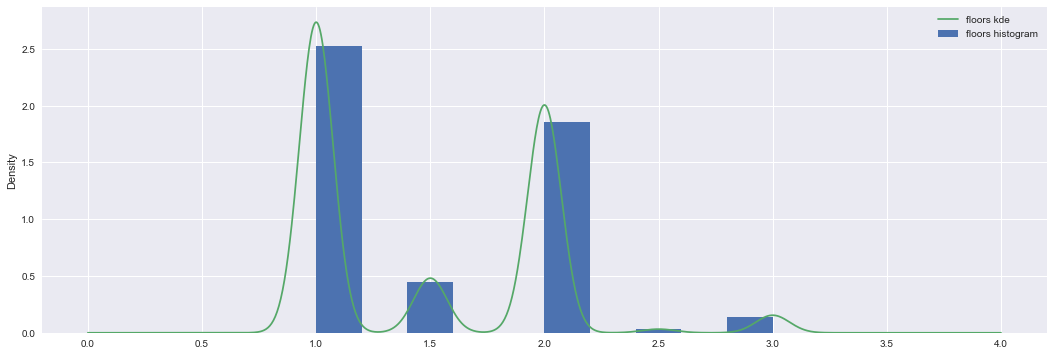

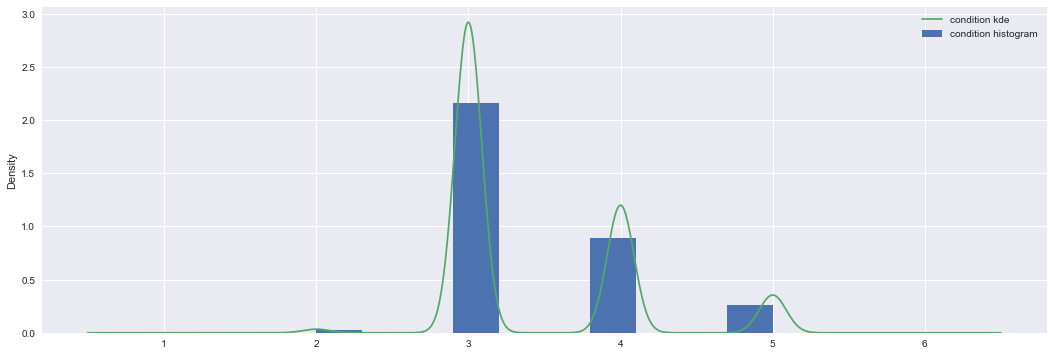

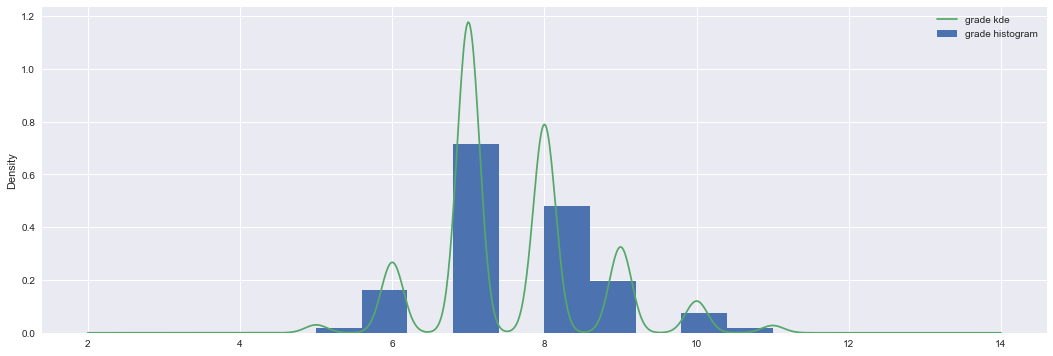

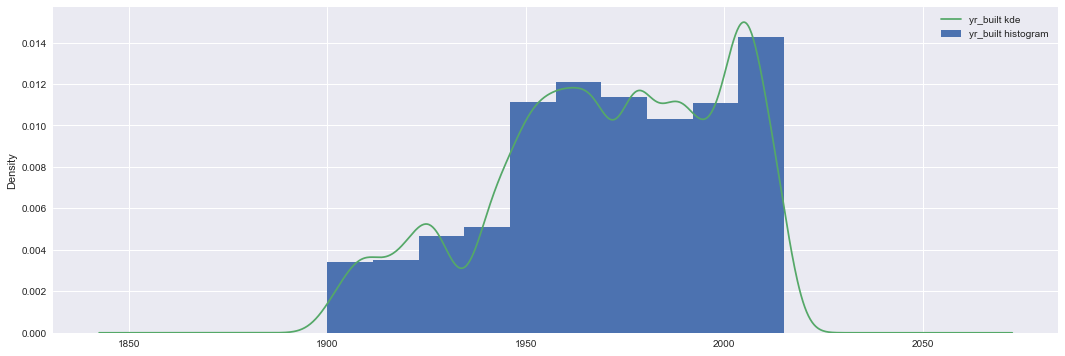

In [17]:
# Review the histograms and KDE overlay after removal of outliers
for column in data:
    fig, axs = plt.subplots(sharey=True, figsize=(18, 6))
    data[column].plot.hist(density=True, label=column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Checking overall price distribution

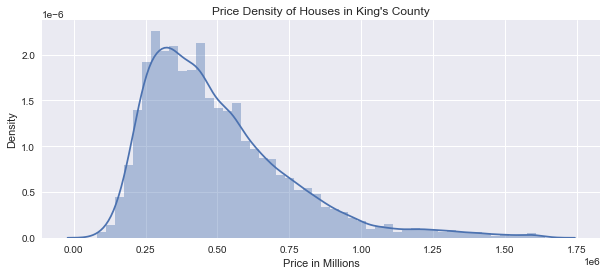

In [18]:
plt.figure(figsize=(10,4))

price_dist = sns.distplot(data["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.show()

The distribution is right skewed so we can try to make this more normalised by creating a log distribution

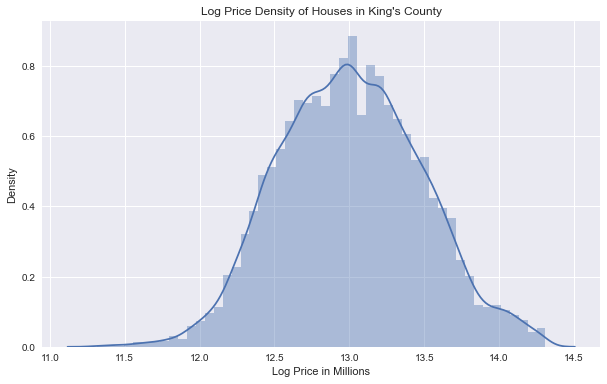

In [19]:
plt.figure(figsize=(10,6))

logged_price_dist = sns.distplot(np.log(data["price"]))
logged_price_dist.set(xlabel="Log Price in Millions", title="Log Price Density of Houses in King's County")
plt.show()

This looks a lot more normalised and making it much easier o work withlater on.

# Correlation Visualisation

We want to view the dataset in a correlation matrix to see what data correlates with one another so we can use it to check for it's impact on the property prices.

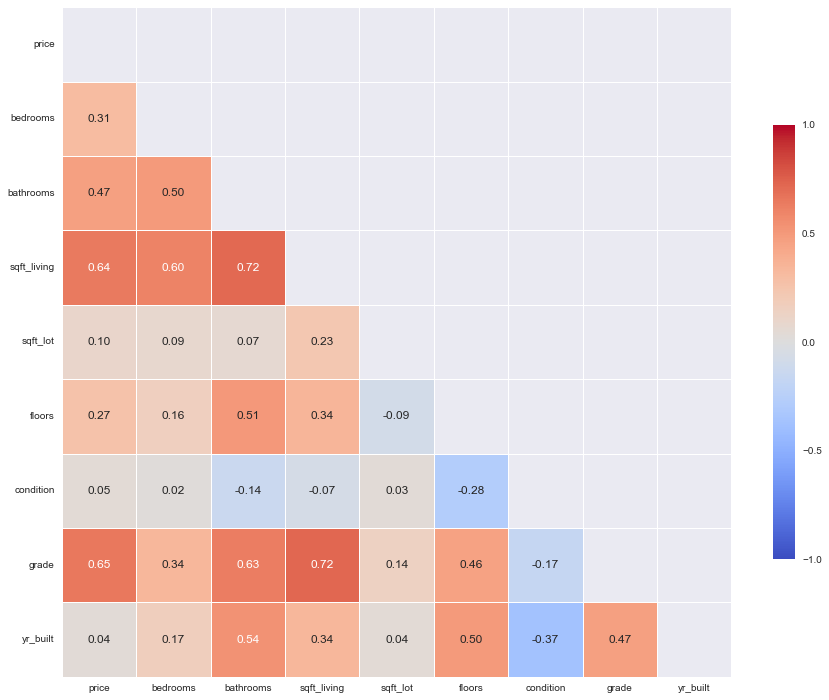

In [20]:
# Visulaise with a correlation matrix using heatmap
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, 
            mask=mask,
            square = True,
            linewidths = .5,
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4, 
                    "ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {"size": 12},
            fmt = ".2f")

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
plt.show()

Drop columns with low correlation based on values from the correlation matrix above and then do another check of the data to be used in a Histogram for visiual representation of data

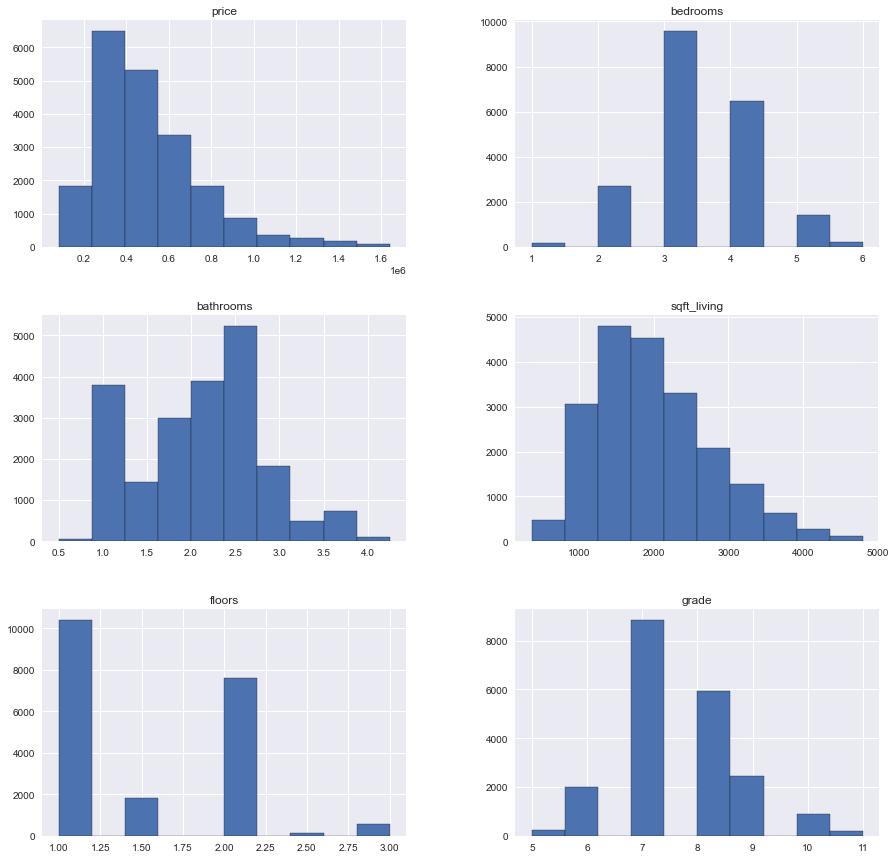

In [21]:
# Drop items with low correlation to price
data = data.drop(data[['sqft_lot', 'condition', 'yr_built']], axis=1)
data.hist(figsize=(15,15), edgecolor = 'black');

# Linear Regression Checks

Now to do some linear regression checks on the data we will use.

In [22]:
import statsmodels.formula.api as smf
import scipy.stats as stats

f = 'price~bedrooms'
f2 = 'price~bathrooms'
f3 = 'price~sqft_living'
f4 = 'price~floors'
f5 = 'price~grade'

model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()
model3 = smf.ols(formula=f3, data=data).fit()
model4 = smf.ols(formula=f4, data=data).fit()
model5 = smf.ols(formula=f5, data=data).fit()

print('R-Squared bedrooms:',model.rsquared)
print('R-Squared bathrooms:',model2.rsquared)
print('R-Squared sqft_living:',model3.rsquared)
print('R-Squared floors:',model4.rsquared)
print('R-Squared grade:',model5.rsquared)

R-Squared bedrooms: 0.0940830881384831
R-Squared bathrooms: 0.2196605100466844
R-Squared sqft_living: 0.41384624733799047
R-Squared floors: 0.0704057435149994
R-Squared grade: 0.42618380257388166


   sqft_living
0          370
1         4800
0    1.616760e+05
1    1.083261e+06
dtype: float64


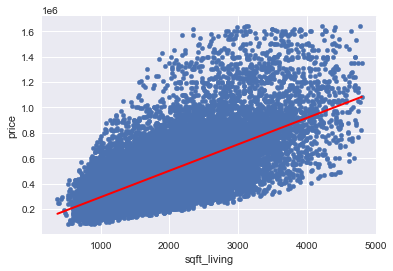

In [23]:
X_new = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new.head())

preds = model3.predict(X_new)
print (preds)

data.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

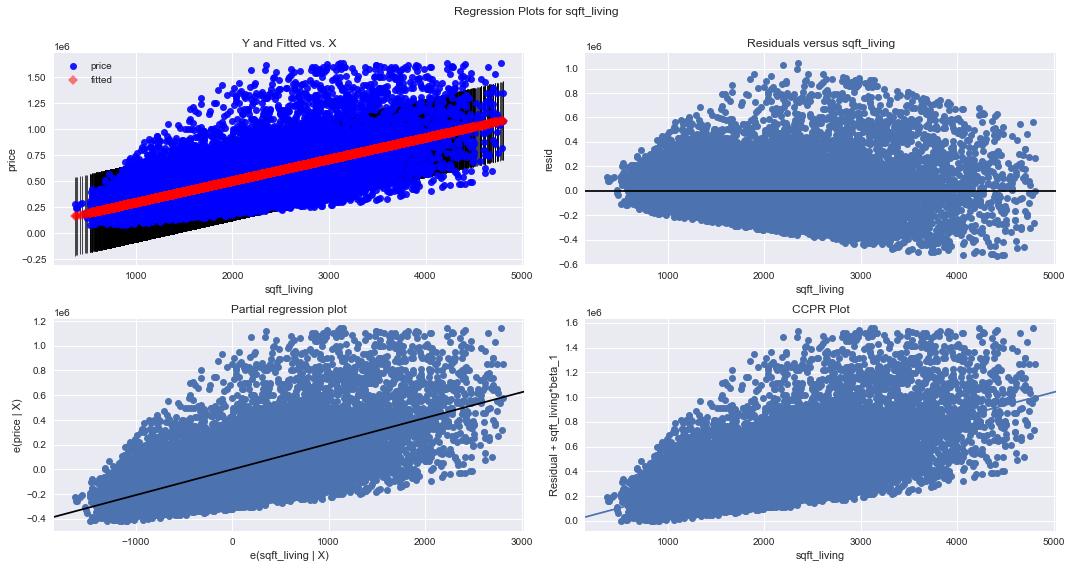

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "sqft_living", fig=fig)
plt.show()

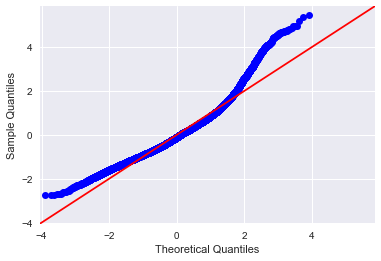

In [25]:
import scipy.stats as stats
residuals = model3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

Can see above that the data is relatively normalised as it mostly follows the red line

R-Squared: 0.0940830881384831
Intercept    199725.444896
bedrooms      89983.093123
dtype: float64


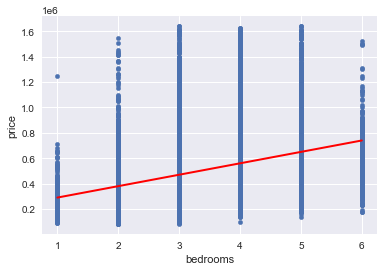

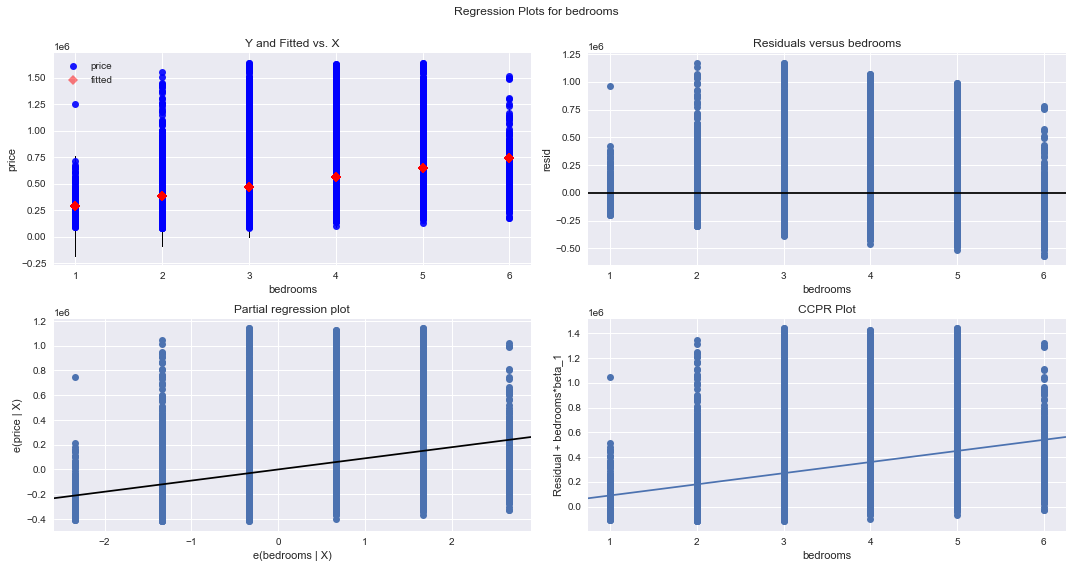

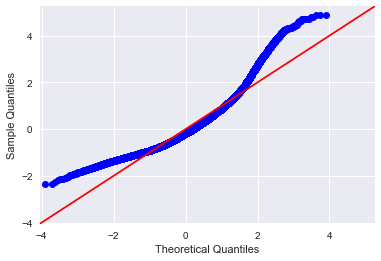

In [26]:
# Repeat for the other data
f = 'price~bedrooms'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bedrooms': [data.bedrooms.min(), data.bedrooms.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='bedrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.2196605100466844
Intercept    153099.021103
bathrooms    168103.244839
dtype: float64


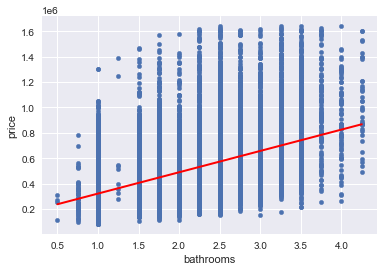

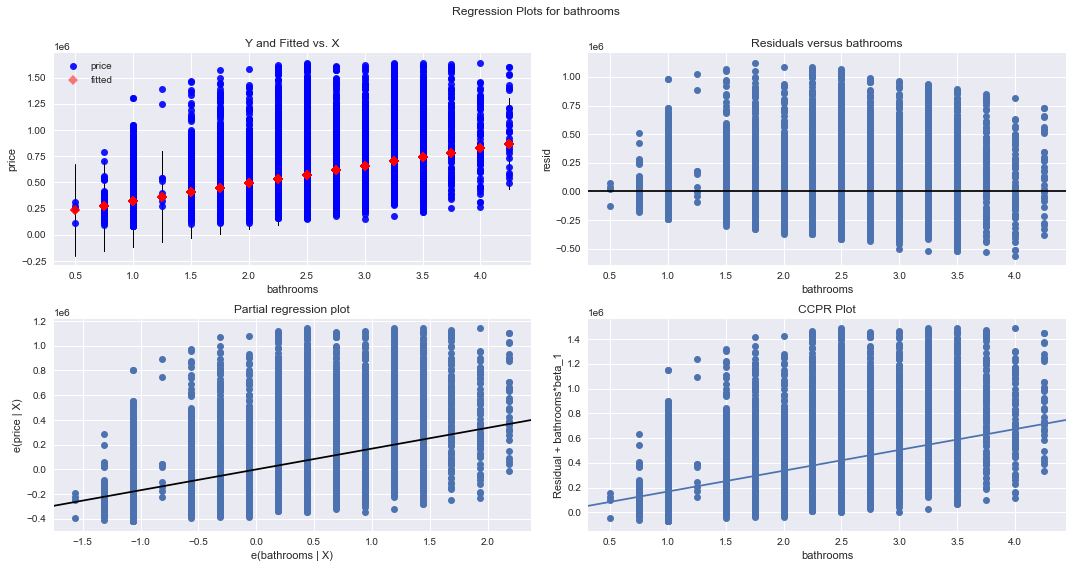

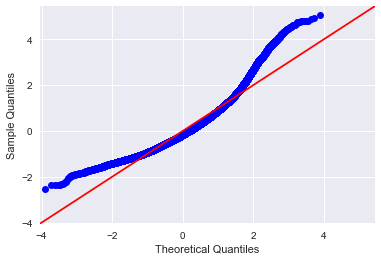

In [27]:
# Repeat for the other data
f = 'price~bathrooms'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bathrooms': [data.bathrooms.min(), data.bathrooms.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='bathrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.0704057435149994
Intercept    316042.392327
floors       124077.202506
dtype: float64


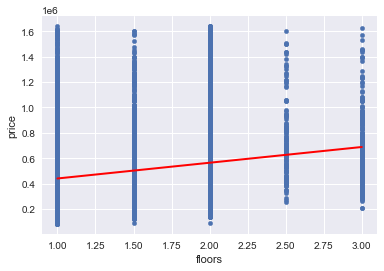

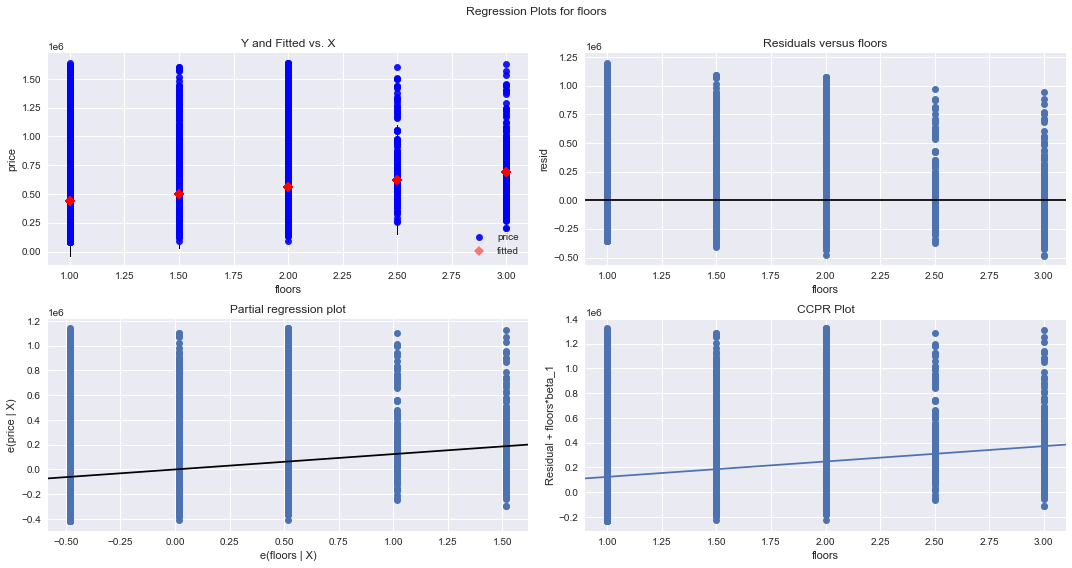

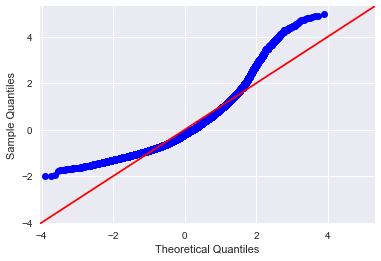

In [28]:
# Repeat for the other data
f = 'price~floors'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'floors': [data.floors.min(), data.floors.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='floors', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.42618380257388166
Intercept   -671674.284706
grade        154580.450139
dtype: float64


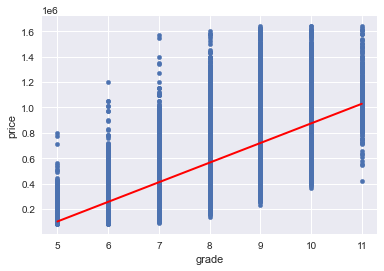

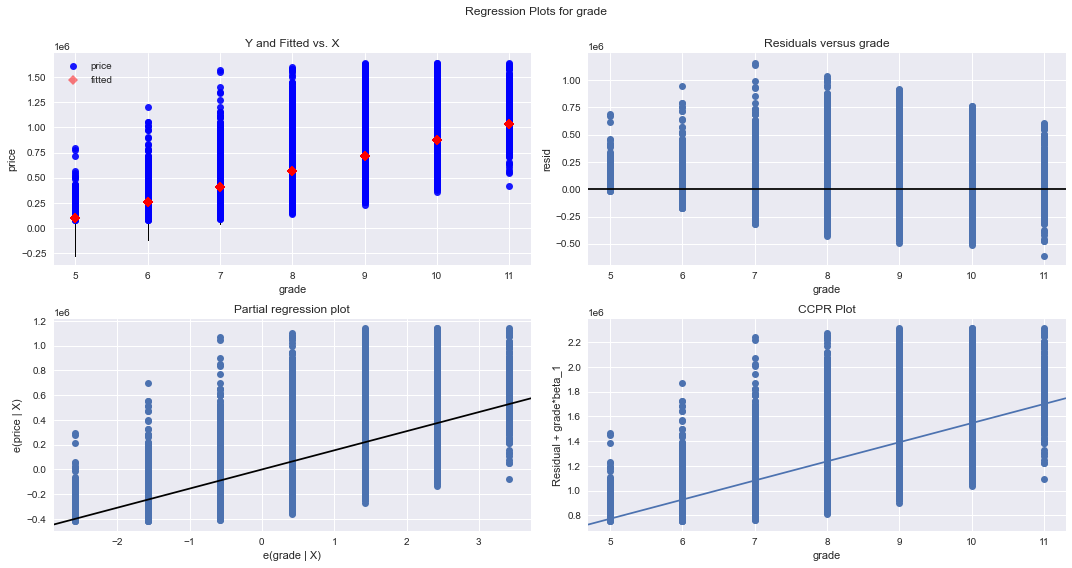

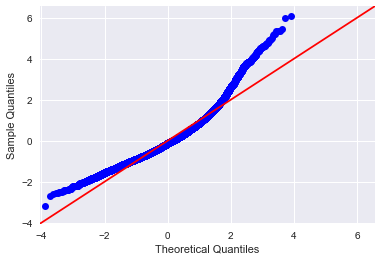

In [29]:
# Repeat for the other data
f = 'price~grade'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'grade': [data.grade.min(), data.grade.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='grade', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

# Regression Analysis

Now baseline model is done we can move on to regression analysis

In [30]:
# Check data types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20557 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20557 non-null  float64
 1   bedrooms     20557 non-null  int64  
 2   bathrooms    20557 non-null  float64
 3   sqft_living  20557 non-null  int64  
 4   floors       20557 non-null  float64
 5   grade        20557 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.1 MB


In [31]:
# Change data types of categoricals to object so it can be used as prefix in next operation
data[['bedrooms', 'bathrooms', 'floors', 'grade']] = data[['bedrooms', 'bathrooms', 'floors', 'grade']].astype('object')
data.dtypes

price          float64
bedrooms        object
bathrooms       object
sqft_living      int64
floors          object
grade           object
dtype: object

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

continuous = ['price', 'sqft_living']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'grade']

data_cont = data[continuous]

log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

# one hot encode categoricals
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)

X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

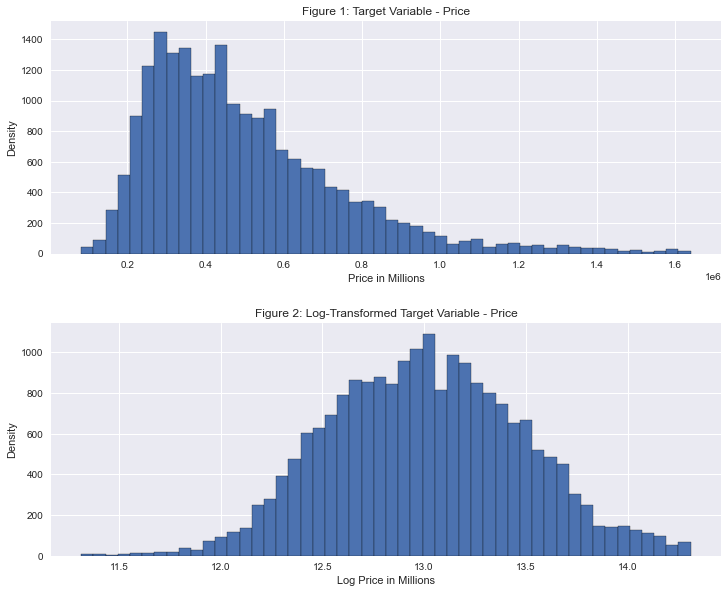

In [33]:
X_log = np.log(data['price'])
X_1 = data['price']

fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout(h_pad=5)
grid = plt.GridSpec(2, 1, hspace=10)

ax[0].hist(X_1, bins=50, edgecolor = 'black')
ax[0].set(xlabel = "Price in Millions", ylabel = "Density")
ax[0].set_title("Figure 1: Target Variable - Price")
ax[1].hist(X_log, bins=50, edgecolor = 'black')
ax[1].set(xlabel = "Log Price in Millions", ylabel = "Density")
ax[1].set_title("Figure 2: Log-Transformed Target Variable - Price")
plt.show()

In [34]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

14389 6168 14389 6168


In [35]:
# Apply and model the train-test set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.4786065657498161
Test Mean Squarred Error: 0.4852373857492091


We can see that the mean train and test MSE are very similar so we can conclude that our model will replicate results with relative accuracy.

# Conclusion

We can reject the null hypothesis that there's no relationship between house prices and other factors such as the size of living area, bedrooms, bathrooms, etc. These factors do in fact have an effect on the price of a property.
It appears that bigger is better, with more living area, more bedrooms and bathrooms typically reflected in a higher sale price of the properties.